In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df = df.drop('id',axis=1)
df = df.drop('Unnamed: 32', axis=1)

In [2]:
def parse_diagnosis(diagnosis):
    if diagnosis == 'B':
        return 0
    else:
        return 1

In [3]:
df['diagnosis'] = df['diagnosis'].apply(parse_diagnosis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

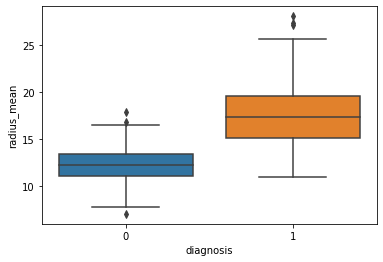

In [5]:
sns.boxplot(x='diagnosis', y='radius_mean',data=df)

<AxesSubplot:xlabel='Radius Mean', ylabel='Texture Mean'>

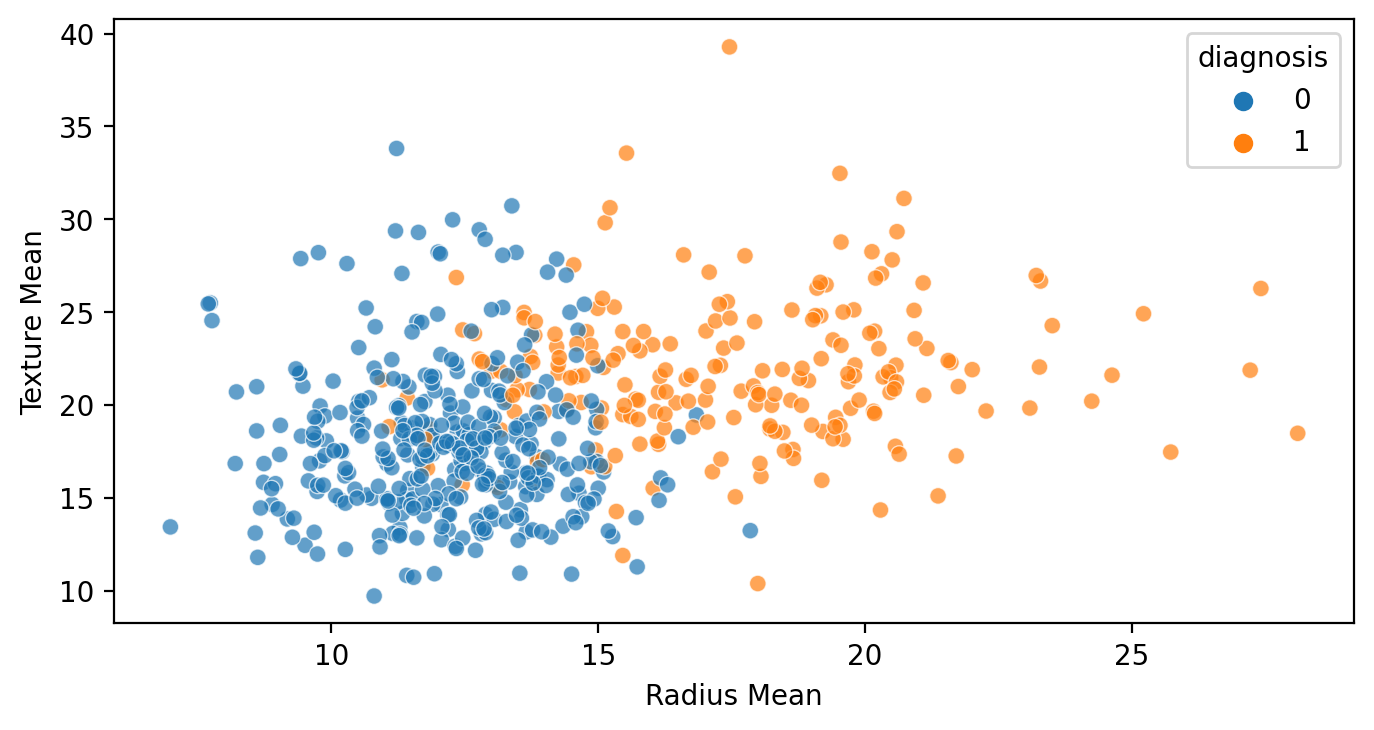

In [6]:
plt.figure(figsize=(8,4),dpi=200)
plt.ylabel('Texture Mean')
plt.xlabel('Radius Mean')
sns.scatterplot(x='radius_mean', y='texture_mean',data=df,hue='diagnosis',alpha=0.7)

In [7]:
df = df[df.columns[0:11]]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [8]:
cols = df.columns[1:11]


In [9]:
for col in cols:
    min_val = df[col].min()
    max_val = df[col].max()
    range_val = max_val - min_val
    df[col + '_percentile'] = (df[col] - min_val) / range_val
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   diagnosis                          569 non-null    int64  
 1   radius_mean                        569 non-null    float64
 2   texture_mean                       569 non-null    float64
 3   perimeter_mean                     569 non-null    float64
 4   area_mean                          569 non-null    float64
 5   smoothness_mean                    569 non-null    float64
 6   compactness_mean                   569 non-null    float64
 7   concavity_mean                     569 non-null    float64
 8   concave points_mean                569 non-null    float64
 9   symmetry_mean                      569 non-null    float64
 10  fractal_dimension_mean             569 non-null    float64
 11  radius_mean_percentile             569 non-null    float64

In [10]:
df = df.drop(cols,axis = 1)
df

,diagnosis,radius_mean_percentile,texture_mean_percentile,perimeter_mean_percentile,area_mean_percentile,smoothness_mean_percentile,compactness_mean_percentile,concavity_mean_percentile,concave points_mean_percentile,symmetry_mean_percentile,fractal_dimension_mean_percentile
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


In [11]:
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [12]:


df = df.melt('diagnosis', var_name='cols',  value_name='vals')
def parse_diagnosis(diagnosis):
    if diagnosis == 0:
        return 'benign'
    else:
        return 'malignant'
    
df['diagnosis'] = df['diagnosis'].apply(parse_diagnosis)


/home/karhoi/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/karhoi/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/karhoi/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/karhoi/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/karhoi/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarnin

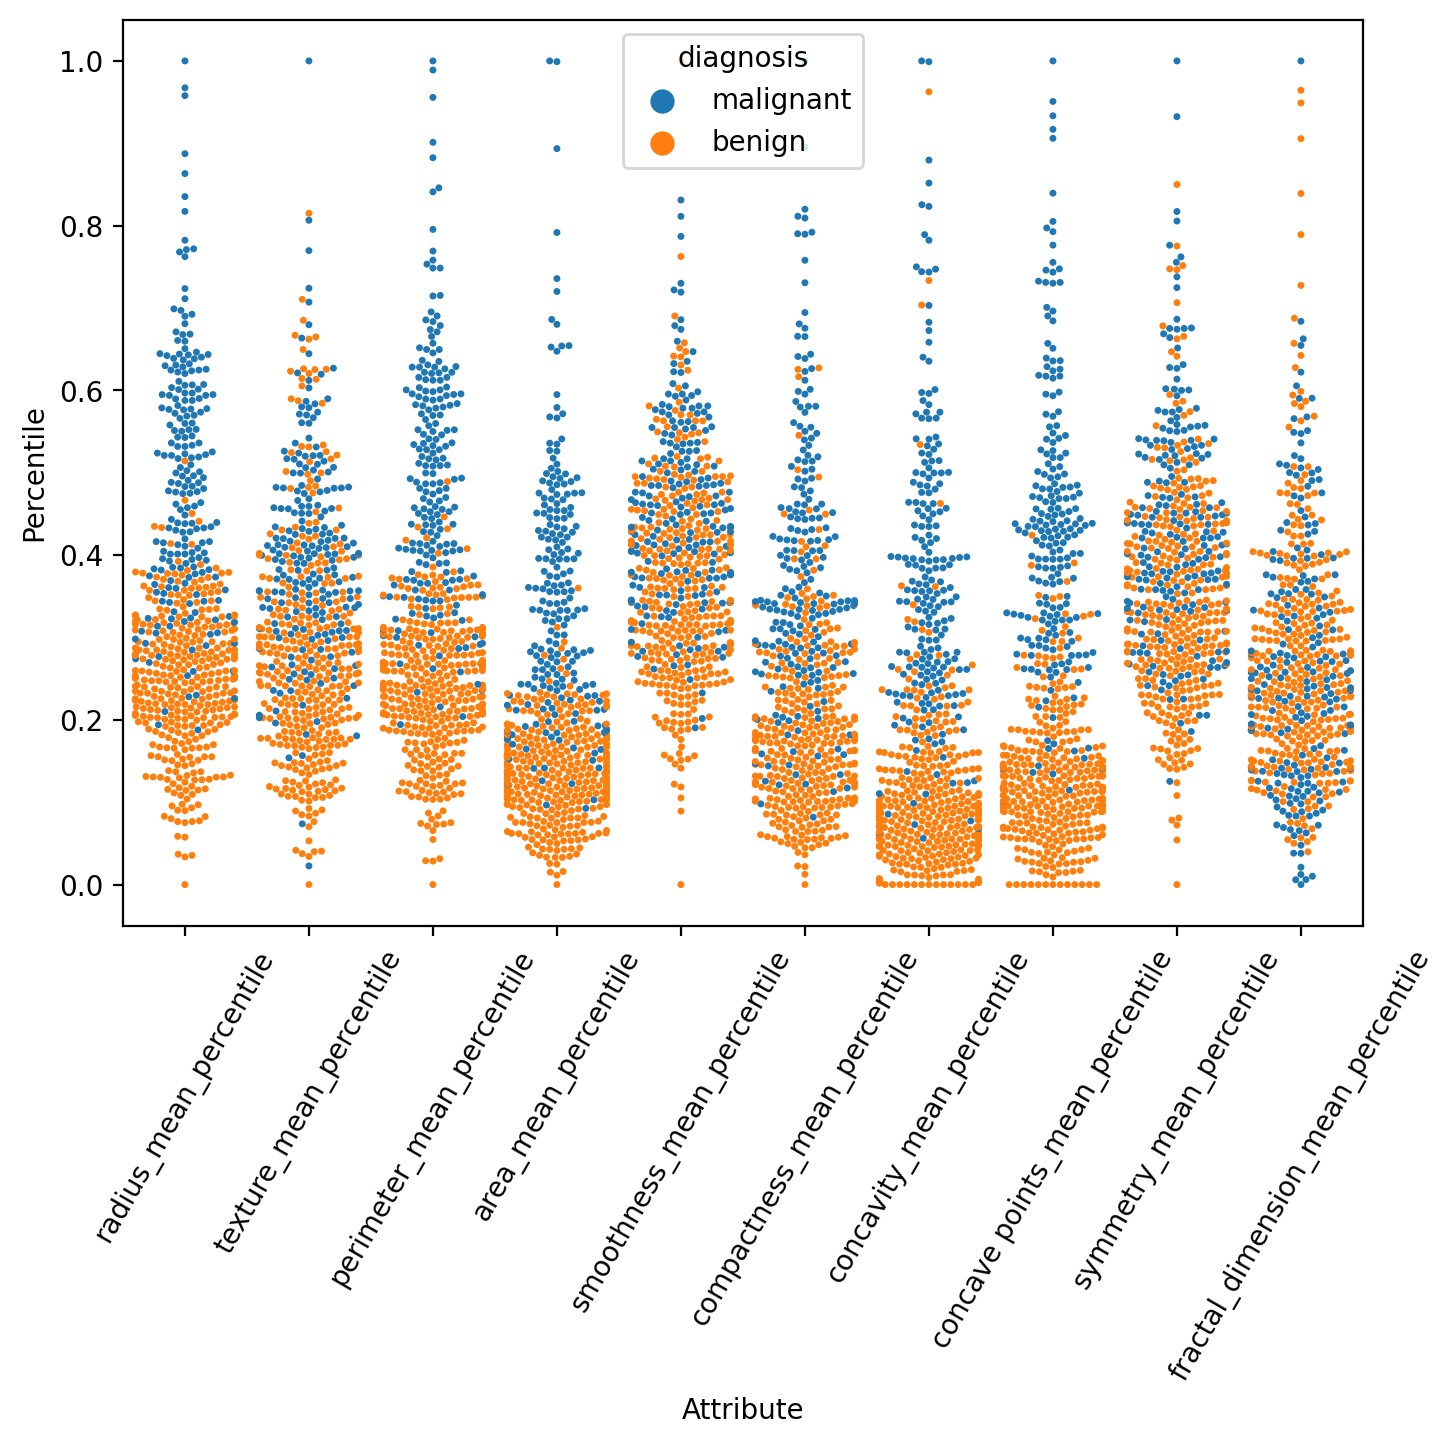

In [15]:
plt.figure(figsize=(8,6),dpi=200)
plt.xticks(rotation=60)



ax = sns.swarmplot( x='cols',y="vals", data=df,size = 2.5,hue = 'diagnosis')
ax.set(xlabel="Attribute", ylabel = "Percentile")

plt.savefig('plot.jpg')